In [88]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp 

In [89]:
from scipy.constants import epsilon_0

In [90]:
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.serif'] = ['Hoefler', 'Times']
plt.rcParams['mathtext.fontset'] = 'stix'

# Решатель ЛР 3.06

In [91]:
# --- CHANGE THIS --- 
# Параметры установки
standR1 = 47e3
standR2 = 470e3
standC1 = 1e-6
standS  = 500e-6
standD  = 0.5e-3

In [92]:
# -- CHANGE THIS ---
# Задание 6

measuremntK = 5.0    # Масштаб в В/дел

# Измерения из пункта 6 в делениях
measurementDs_ticks = 2.8  # Край по Y
measurementEs_ticks = 2.7  # Край по X

# Предыдущие измерения в вольтах
measurementUC1 = measurementDs_ticks * measuremntK
measurementUR1 = measurementEs_ticks * measuremntK

measurementDr_ticks = 1.0 # Пересечение с осью по Y 
measurementEc_ticks = 0.6  # Пересечение с осью по X

print(measurementUC1, measurementUR1)

14.0 13.5


In [93]:
# --- CHANGE THIS ---  
# Напряжения Таблица 1 Столбец 1
table1U = np.array([
    17, 15, 13, 11, 9, 7, 5, 4.4, 3.8, 3.2, 2.6, 2.0, 1.4, 0.4, 0.2
])

# Масштаб Таблица 1 Столбец 2
table1Kx = np.array([
    5,5,5,5, 2,2,2, 1,1,1,1, 0.5,0.5, 0.2, 0.05
])

# Масштаб Таблица 1 Столбец 3
table1Ky = np.array([
    5,5,5,5, 2,2,2, 1, .5,.5,.5, .2, .1, .05, .02
])

# Абсцисса Таблица 1 Столбец 4
table1X = np.array([
    2.7,2.4,2.1,1.8,3.6,2.8,2.0,3.6,2.1,2.6,2.1,3.2,2.2,3.1,2.9
])

# Ордината Таблица 1 Столбец 5
table1Y = np.array([
    3.3,2.8,2.7,2.3,3.9,2.8,1.4,2.2,3.2,2.3,1.6,2.7,3.1,3.0,1.6
])

table1U.shape, table1Kx.shape


((15,), (15,))

# Обработка экспереметальных данных

## 1

### $D_s$

In [94]:
task1Ds = standC1 / standS * measurementUC1  # Formula 13
print(task1Ds)

0.028


### $E_s$

In [95]:
task1Es = (standR1 + standR2) / standR1 * measurementUR1 / standD # Formula 16
task1Es

297000.0

### $P_r$

$D_r = P_r = \dfrac{C_1}{s} D_r \cdot K$

In [96]:
task1Pr = standC1 / standS * measurementDr_ticks * measuremntK
print(task1Pr)

0.01


In [97]:
task1Ec = (standR1 + standR2) / standR1 * measurementEc_ticks * measuremntK
print(task1Ec)

33.0


## 2

![](loop-high-contrast.jpg)

Верхнюю и нижнюю кривые аппроксимируем и найдем площадь как интеграл между ними

In [98]:
# --- CHANGE THIS ---
# точки на верхней кривой по которым вычислится площадь
task2TopCurvePoints = np.array([
    [-measurementEs_ticks, -measurementDs_ticks],
    [-2, -2.1],
    [-1, -0.8],
    [-measurementEc_ticks, 0],
    [0, measurementDr_ticks],
    [1, 1.9],
    [2, 2.6],
    [measurementEs_ticks, measurementDs_ticks]
])

task2TopCurveCoeffs = np.polyfit(
    task2TopCurvePoints[:,0], task2TopCurvePoints[:,1], 5
)
print(task2TopCurveCoeffs)

[ 0.00188989  0.01559061 -0.06360667 -0.23245769  1.40015967  0.87934986]


In [99]:
# --- CHANGE THIS ---
# точки на нижней кривой по которым вычислится площадь
task2BotCurvePoints = np.array([
    [-measurementEs_ticks, -measurementDs_ticks],
    [-2, -2.5],
    [-1, -2],
    [0, -measurementDr_ticks],
    [measurementEc_ticks, 0],
    [1, 0.7],
    [2, 2.2],
    [measurementEs_ticks, measurementDs_ticks]
])

task2BotCurveCoeffs = np.polyfit(
    task2BotCurvePoints[:,0], task2BotCurvePoints[:,1], 5
)
print(task2BotCurveCoeffs)

[ 0.00285312 -0.02259873 -0.07403061  0.29483573  1.42513958 -0.9524067 ]


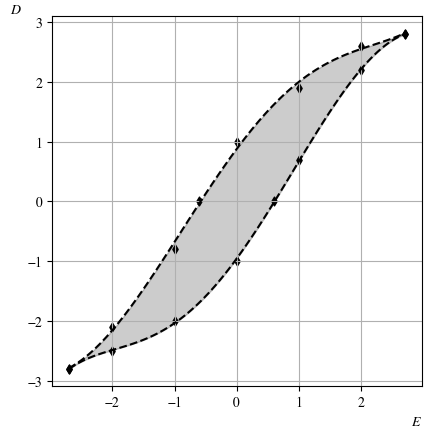

In [100]:
fig, ax = plt.subplots()
ax.set_box_aspect(1)

ax.set_xlabel('$E$', loc='right')
ax.set_ylabel('$D$', loc='top', rotation=0)

ax.scatter(
    task2TopCurvePoints[:, 0], task2TopCurvePoints[: ,1],
    c='black', s=20, marker='d'
)
ax.scatter(
    task2BotCurvePoints[:, 0], task2BotCurvePoints[: ,1],
    c='black', s=20, marker='d'
)

xs = np.linspace(-measurementEs_ticks, measurementEs_ticks, 100)
ytop = np.polyval(task2TopCurveCoeffs,  np.linspace(-measurementEs_ticks, measurementEs_ticks, 100))
ybot = np.polyval(task2BotCurveCoeffs,  np.linspace(-measurementEs_ticks, measurementEs_ticks, 100))

ax.plot(
    xs,
    ytop,
    '--', c='black', linewidth=1.5
)
ax.plot(
    xs,
    ybot,
    '--', c='black', linewidth=1.5
)

ax.fill_between(xs, ytop, ybot, color='black', alpha=.2)

ax.grid()

fig.savefig('task2fig.svg')

In [101]:
symbolX = sp.symbols('x', real=True)
task2TopPoly =  sp.Poly(task2TopCurveCoeffs, symbolX)
task2TopPoly

Poly(0.00188988931500665*x**5 + 0.0155906127303955*x**4 - 0.0636066672849179*x**3 - 0.232457685031377*x**2 + 1.4001596709756*x + 0.879349855584172, x, domain='RR')

In [102]:
task2BotPoly = sp.Poly(task2BotCurveCoeffs, symbolX)
task2BotPoly

Poly(0.00285311694940667*x**5 - 0.0225987345328868*x**4 - 0.0740306050510353*x**3 + 0.294835734778522*x**2 + 1.42513958419297*x - 0.952406704710386, x, domain='RR')

### $S_0$

In [103]:
task2CurveArea = sp.integrate( task2TopPoly.as_expr() - task2BotPoly.as_expr() , (symbolX, -measurementEs_ticks, measurementEs_ticks))
task2CurveArea = float(task2CurveArea)
task2CurveArea

5.164242739931286

### $\tan \delta$

In [104]:
task2Tangent = (1 / np.pi) * task2CurveArea / (measurementDs_ticks * measurementEs_ticks)
task2Tangent

0.21743776703346496

# 3

### $E$

In [105]:
table1E = (standR1 + standR2) / standR1 * table1X * table1Kx / standD # Formula 16
table1E

array([297000., 264000., 231000., 198000., 158400., 123200.,  88000.,
        79200.,  46200.,  57200.,  46200.,  35200.,  24200.,  13640.,
         3190.])

In [106]:
table1D = standC1 / standS * (table1Y * table1Ky)  # Formula 13
table1D

array([3.30e-02, 2.80e-02, 2.70e-02, 2.30e-02, 1.56e-02, 1.12e-02,
       5.60e-03, 4.40e-03, 3.20e-03, 2.30e-03, 1.60e-03, 1.08e-03,
       6.20e-04, 3.00e-04, 6.40e-05])

### График $ D = D(E) $

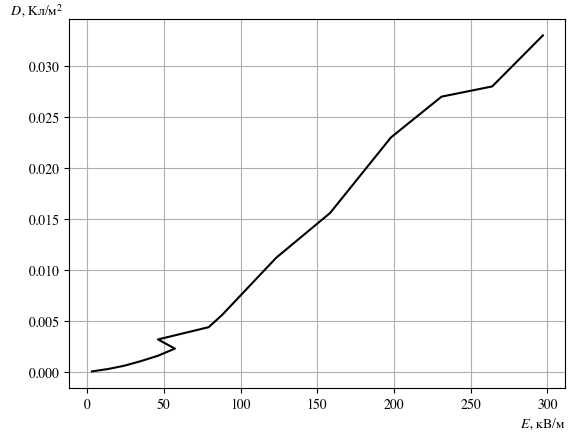

In [107]:
fig, ax = plt.subplots()

ax.set_xlabel('$E$, кВ/м', loc='right')
ax.set_ylabel('$D$, Кл/м$^2$', rotation=0, loc='top', labelpad=-25)

ax.plot(table1E*1e-3, table1D, '-', linewidth=1.5, c='black')
ax.grid()

fig.savefig('task3fig.svg')

# 4

### $ \varepsilon $

In [108]:
table1Epsilon = table1D / table1E / epsilon_0
table1Epsilon

array([12548.98963748, 11978.58101759, 13200.88520306, 13119.39825736,
       11122.96808776, 10267.35515794,  7187.14861056,  6274.49481874,
        7822.746787  ,  4541.33016601,  3911.3733935 ,  3465.2323658 ,
        2893.52736269,  2484.03753821,  2265.89906934])

### График $ \varepsilon = \varepsilon(E) $, $\varepsilon_{нач}$

3104.4073678697623


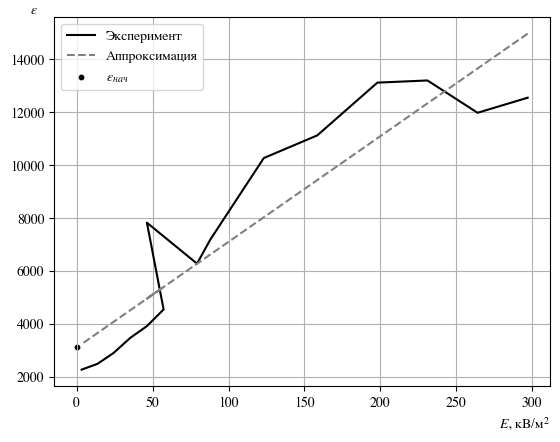

In [109]:
fig, ax = plt.subplots()

ax.set_xlabel('$E$, кВ/м$^2$', loc='right')
ax.set_ylabel(r'$\varepsilon$', loc='top', rotation=0, labelpad=-20)
ax.grid()

ax.plot(
    table1E*1e-3, table1Epsilon, 
    '-', linewidth=1.5, c='black',
    label='Эксперимент'
)

epsilonTrendLine = np.polyfit(table1E*1e-3, table1Epsilon, 1)

ax.plot(
    table1E*1e-3, np.polyval(epsilonTrendLine, table1E*1e-3),
    '--', linewidth=1.5, c='grey',
    label='Аппроксимация'
)

task5EpsilonStart = np.polyval(epsilonTrendLine, 0)
print(task5EpsilonStart)

ax.scatter(0, task5EpsilonStart, 
    c='black', marker='o', s=10,
    label=r'$\varepsilon_{нач}$'
)

ax.legend()


# 6
### $ \varepsilon_{max} $

In [110]:
task6EpsilonMax = max(table1Epsilon)
print(task6EpsilonMax)

13200.885203061262


In [111]:
EpsilonMaxIndex, = np.where(table1Epsilon == task6EpsilonMax)
print(EpsilonMaxIndex)

[2]


In [112]:
task6EMax = table1E[EpsilonMaxIndex]
print(task6EMax)

[231000.]


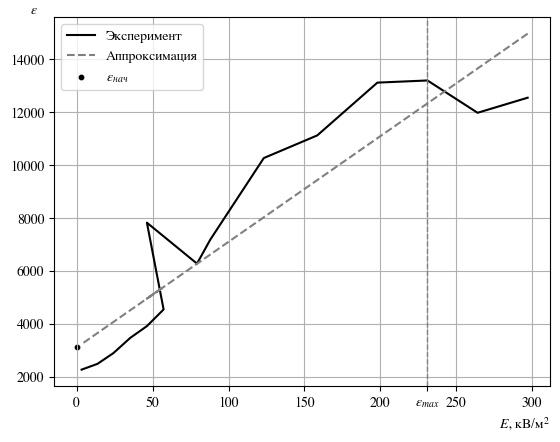

In [113]:
fig, ax

xlim = ax.get_xlim()
ylim = ax.get_ylim()


ax.axvline(task6EMax*1e-3,
    linestyle='--', linewidth=1, color='grey'
)

ax.set_xticks(np.concat([ax.get_xticks(), task6EMax*1e-3]))

labels = ax.get_xticklabels()
labels[-1] = r'$\varepsilon_{max}$'
ax.set_xticklabels(labels)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

fig.savefig('tasks4-6fig.svg')
fig

In [114]:
for no in range(1, len(table1U)):
    print(f'[{no:2d}]', end=',')
    print(f'[{table1U[no]:6.3f}]', end=',')
    print(f'[{table1Kx[no]:.2f}]', end=',')
    print(f'[{table1Ky[no]:.2f}]', end=',')
    print(f'[{table1X[no]:.1f}]', end=',')
    print(f'[{table1Y[no]:.1f}]', end=',')
    print(f'[{table1E[no]:9.2f}]', end=',')
    print(f'[{table1D[no]:7.5f}]', end=',')
    print(f'[{table1Epsilon[no]:9.3f}]', end=',')
    print()

[ 1],[15.000],[5.00],[5.00],[2.4],[2.8],[264000.00],[0.02800],[11978.581],
[ 2],[13.000],[5.00],[5.00],[2.1],[2.7],[231000.00],[0.02700],[13200.885],
[ 3],[11.000],[5.00],[5.00],[1.8],[2.3],[198000.00],[0.02300],[13119.398],
[ 4],[ 9.000],[2.00],[2.00],[3.6],[3.9],[158400.00],[0.01560],[11122.968],
[ 5],[ 7.000],[2.00],[2.00],[2.8],[2.8],[123200.00],[0.01120],[10267.355],
[ 6],[ 5.000],[2.00],[2.00],[2.0],[1.4],[ 88000.00],[0.00560],[ 7187.149],
[ 7],[ 4.400],[1.00],[1.00],[3.6],[2.2],[ 79200.00],[0.00440],[ 6274.495],
[ 8],[ 3.800],[1.00],[0.50],[2.1],[3.2],[ 46200.00],[0.00320],[ 7822.747],
[ 9],[ 3.200],[1.00],[0.50],[2.6],[2.3],[ 57200.00],[0.00230],[ 4541.330],
[10],[ 2.600],[1.00],[0.50],[2.1],[1.6],[ 46200.00],[0.00160],[ 3911.373],
[11],[ 2.000],[0.50],[0.20],[3.2],[2.7],[ 35200.00],[0.00108],[ 3465.232],
[12],[ 1.400],[0.50],[0.10],[2.2],[3.1],[ 24200.00],[0.00062],[ 2893.527],
[13],[ 0.400],[0.20],[0.05],[3.1],[3.0],[ 13640.00],[0.00030],[ 2484.038],
[14],[ 0.200],[0.05],[0.0